# Исследование рынка общественного питания в Москве

**Цель проекта:** выбор подходящего формата и места для открытия заведения общественного питания в Москве.

**Задачи проекта:** исследовать рынок, найти интересные особенности и презентовать полученные результаты.

**Данные:** датасет с заведениями общественного питания Москвы, составленный летом 2022 года.

### Описание данных

Файл moscow_places.csv:\
name — название заведения;\
address — адрес заведения;\
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;\
hours — информация о днях и часах работы;\
lat — широта географической точки, в которой находится заведение;\
lng — долгота географической точки, в которой находится заведение;\
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);\
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;\
avg_bill — средняя стоимость заказа;\
middle_avg_bill — средний чек;\
middle_coffee_cup — цена одной чашки капучино;\
chain — показатель, является ли заведение сетевым ;\
district — административный район, в котором находится заведение;\
seats — количество посадочных мест.

# Шаг 1. Загрузите данные и изучите общую информацию


In [1]:
#загрузим нужные библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import math as mth
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objects as go

In [2]:
#загрузим данные в переменную 'data'
try:
   data = pd.read_csv('/datasets/moscow_places.csv', sep=',')
except:
   data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv', sep=',')

In [3]:
#общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Изучите общую информацию о датасете. Сколько заведений представлено? Что можно сказать о каждом столбце? Значения какого типа они хранят?

In [4]:
#общая информация
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


# Шаг 2. Выполните предобработку данных

Изучите, есть ли дубликаты в данных. Поищите пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?


Выполните предобработку данных:
Создайте столбец street с названиями улиц из столбца с адресом.
Создайте столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):


логическое значение True — если заведение работает ежедневно и круглосуточно;
логическое значение False — в противоположном случае

In [5]:
data['name'].count()

8406

In [6]:
data['category'].nunique()

8

In [7]:
data.groupby('category')['name'].count()

category
бар,паб             765
булочная            256
быстрое питание     603
кафе               2378
кофейня            1413
пиццерия            633
ресторан           2043
столовая            315
Name: name, dtype: int64

In [8]:
data.groupby('category').agg({'name': 'count'}).sort_values(by='name', ascending=False)#.reset_index()

,name
category,
кафе,2378
ресторан,2043
кофейня,1413
"бар,паб",765
пиццерия,633
быстрое питание,603
столовая,315
булочная,256


# Шаг 3. Анализ данных

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы

Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?


Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы)('https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson')

Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?


Необязательное задание: проиллюстрируйте другие взаимосвязи, которые вы нашли в данных. Например, по желанию исследуйте часы работы заведений и их зависимость от расположения и категории заведения. Также можно исследовать особенности заведений с плохими рейтингами, средние чеки в таких местах и распределение по категориям заведений.

# Шаг 4. Детализируем исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья».\
Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве.\
Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно.\
Попробуйте определить, осуществима ли мечта клиентов.\

Ответьте на следующие вопросы:\
Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?\
Есть ли круглосуточные кофейни?\
Какие у кофеен рейтинги? Как они распределяются по районам?\
На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?\
По желанию вы можете расширить список вопросов для исследования, добавив собственные.\
Постройте визуализации. Попробуйте дать рекомендацию для открытия нового заведения.\
Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано.\
Объяснить свою рекомендацию можно текстом с описанием или маркерами на географической карте.


# Шаг 5. Подготовка презентации

Подготовьте презентацию исследования для инвесторов.\
Отвечая на вопросы о московском общепите, вы уже построили много диаграмм, и помещать каждую из них в презентацию не нужно.\ 
Выберите важные тезисы и наблюдения, которые могут заинтересовать заказчиков.\
Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате PDF.\
Приложите ссылку на презентацию в markdown-ячейке в формате:\
Скопировать код\
Презентация: <ссылка на облачное хранилище с презентацией>\
Следуйте принципам оформления из темы «Подготовка презентации».

In [9]:
print(plt.style.available) # вызовем разные наборы цветов 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


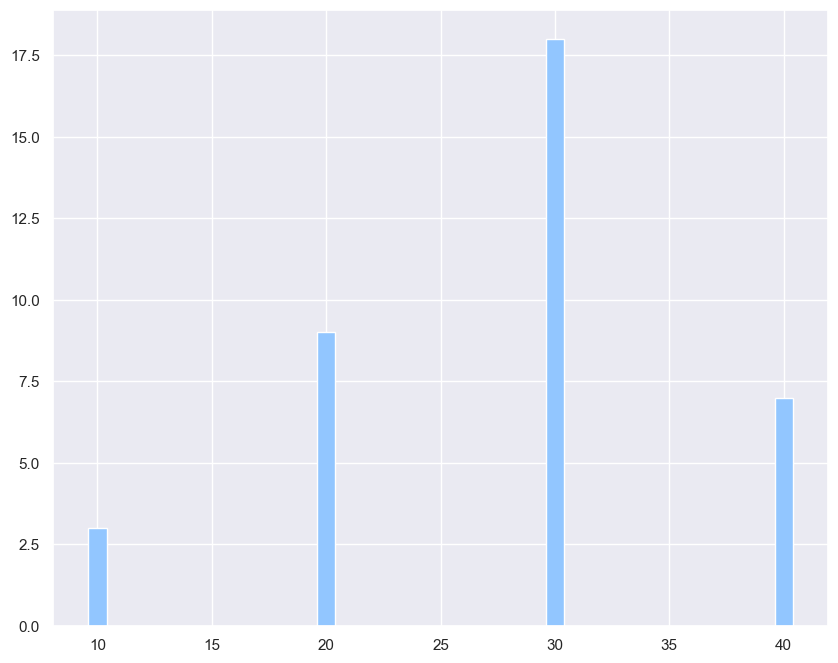

In [10]:
with plt.style.context('seaborn-pastel'):
    plt.bar([10, 20, 30, 40],[3, 9, 18, 7]) 